# Challenge completed with a very simple, sequential model.

# Neural Network SMS Text Classifier

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called predict_message that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the SMS Spam Collection dataset. The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
  pass
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.20.0-dev20250227


In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

In [197]:
#read the files as dataframes
df_train = pd.read_csv(train_file_path,sep = '\t', header=None) 
df_test = pd.read_csv(test_file_path,sep = '\t', header=None)
df_train

,0,1
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...


In [198]:
#separing the 'features' (sms texts) from the 'labels' (ham/spam converted to 0/1)
#in both the train and test sets
train_features = df_train[1]
train_labels = df_train[0].map(lambda x: 1 if x == 'spam' else 0)
test_features = df_test[1]
test_labels = df_test[0].map(lambda x: 1 if x == 'spam' else 0)
print(train_features[:5], '\n\n', train_labels[:5])

0    ahhhh...just woken up!had a bad dream about u ...
1                             you can never do nothing
2    now u sound like manky scouse boy steve,like! ...
3    mum say we wan to go then go... then she can s...
4    never y lei... i v lazy... got wat? dat day ü ...
Name: 1, dtype: object 

 0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64


In [199]:
#preparing the datasets vectorizing the texts

max_features = 10000 #max number of words

vectorize_layer = keras.layers.TextVectorization(max_tokens=max_features,)
vectorize_layer.adapt(train_features)
train_ds = vectorize_layer(train_features) #training dataset
test_ds = vectorize_layer(test_features) #testing dataset
train_ds

<tf.Tensor: shape=(4179, 171), dtype=int64, numpy=
array([[7632, 2425, 3973, ...,    0,    0,    0],
       [   4,   31,  264, ...,    0,    0,    0],
       [  22,    7,  785, ...,    0,    0,    0],
       ...,
       [  49,  450,  313, ...,    0,    0,    0],
       [ 118,   89, 7328, ...,    0,    0,    0],
       [  94,   12,  404, ...,    0,    0,    0]])>

In [200]:
#define the model, compile and run
embedding_dim = 128

model = tf.keras.Sequential([
  keras.layers.Embedding(max_features, embedding_dim),
  keras.layers.Dropout(0.5),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='BinaryCrossentropy',
              optimizer='adam',
              metrics=['BinaryAccuracy'])

epochs = 30
history = model.fit(
    train_ds,
    train_labels,
    validation_data=(test_ds, test_labels),
    epochs=epochs)

Epoch 1/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - BinaryAccuracy: 0.8458 - loss: 0.4564 - val_BinaryAccuracy: 0.8657 - val_loss: 0.3679
Epoch 2/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - BinaryAccuracy: 0.8747 - loss: 0.3747 - val_BinaryAccuracy: 0.8657 - val_loss: 0.3639
Epoch 3/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - BinaryAccuracy: 0.8624 - loss: 0.3925 - val_BinaryAccuracy: 0.8657 - val_loss: 0.3440
Epoch 4/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - BinaryAccuracy: 0.8685 - loss: 0.3695 - val_BinaryAccuracy: 0.8657 - val_loss: 0.3166
Epoch 5/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - BinaryAccuracy: 0.8661 - loss: 0.3581 - val_BinaryAccuracy: 0.8764 - val_loss: 0.2628
Epoch 6/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - BinaryAccuracy: 0.8691 - loss: 0.3140 - val_BinaryAccuracy: 0.9526 - val_loss: 0.1422
Epoch 7/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - BinaryAccuracy: 0.9145 - loss: 0.2316 - val_BinaryAccuracy: 0.9691 - val_loss: 0.0941
Epoch 8/30
13

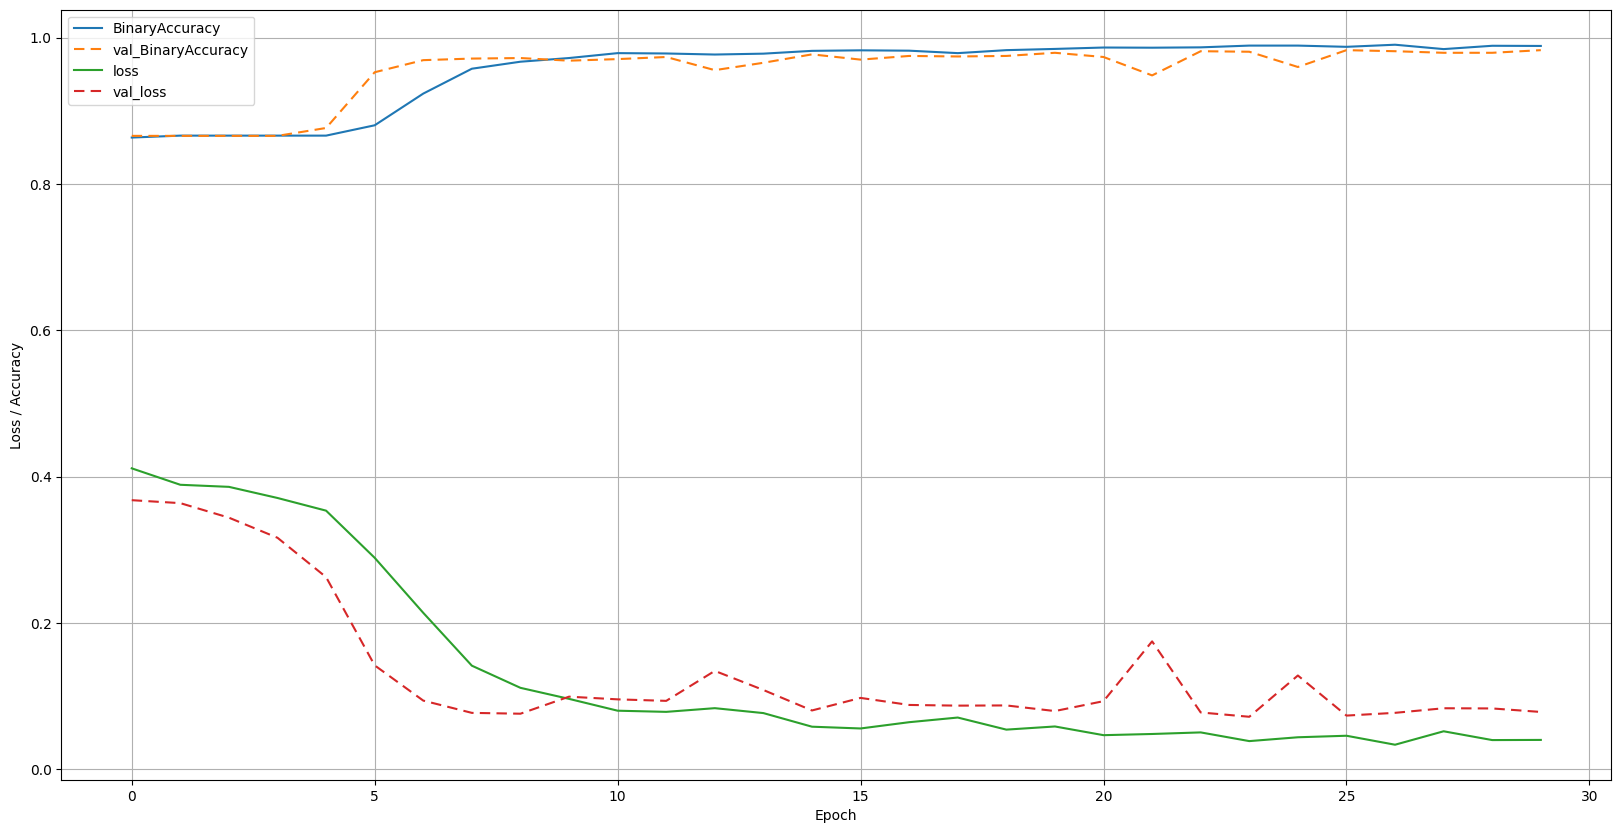

In [201]:
#ploting the result

fig, ax = plt.subplots(figsize=(20,10))

x = [i for i in range(epochs)]
ax.plot(x, history.history['BinaryAccuracy'], label='BinaryAccuracy')
ax.plot(x, history.history['val_BinaryAccuracy'], label='val_BinaryAccuracy', dashes=[5, 3])
ax.plot(x, history.history['loss'], label='loss')
ax.plot(x, history.history['val_loss'], label='val_loss', dashes=[5, 3])
ax.legend()
ax.grid(True)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss / Accuracy')

plt.show()

In [205]:
#plot seems great. Checking a prediction:
pr = model.predict(vectorize_layer(["how are you doing today"]))
float(pr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/tmp/ipykernel_5427/2727815712.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(pr)


2.5506970667554807e-12

In [206]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  pred = float(model.predict(vectorize_layer([pred_text])))
  cat = 'ham' if pred < 0.5 else 'spam'
  prediction = [pred, cat]
  return (prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[2.5506970667554807e-12, 'ham']


/tmp/ipykernel_5427/1584152742.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred = float(model.predict(vectorize_layer([pred_text])))


In [207]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/tmp/ipykernel_5427/1584152742.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred = float(model.predict(vectorize_layer([pred_text])))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
You passed the challenge. Great job!
